In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
platypus_tr = []
for file_path in glob.glob('archive (5)/train/platypus/*'):
    image = cv2.imread(file_path)
    platypus_tr.append(image)

perry_tr = []
for file_path in glob.glob('archive (5)/train/perry/*'):
    image = cv2.imread(file_path)
    perry_tr.append(image)


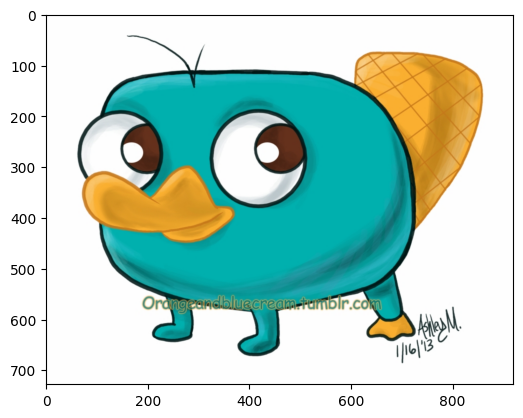

In [4]:
plt.imshow(cv2.cvtColor(platypus_tr[6],cv2.COLOR_BGR2RGB))

In [5]:
perry_labeled = [(image, 'perry') for image in perry_tr]
platypus_labeled = [(image, 'platypus') for image in platypus_tr]

In [6]:
combined_data = perry_labeled + platypus_labeled

In [7]:
combined_data

[(array([[[188, 195, 188],
          [184, 191, 184],
          [177, 184, 177],
          ...,
          [ 65, 139,  79],
          [ 64, 139,  77],
          [ 62, 137,  75]],
  
         [[213, 221, 214],
          [213, 221, 214],
          [214, 222, 215],
          ...,
          [ 78, 149,  93],
          [ 77, 148,  92],
          [ 77, 148,  91]],
  
         [[198, 211, 203],
          [199, 212, 204],
          [200, 213, 205],
          ...,
          [ 74, 139,  93],
          [ 75, 139,  93],
          [ 75, 139,  93]],
  
         ...,
  
         [[102,  96,  85],
          [102,  96,  85],
          [102,  96,  85],
          ...,
          [ 99,  93,  82],
          [ 99,  93,  82],
          [ 99,  93,  82]],
  
         [[102,  96,  85],
          [102,  96,  85],
          [102,  96,  85],
          ...,
          [ 99,  93,  82],
          [ 99,  93,  82],
          [ 99,  93,  82]],
  
         [[102,  96,  85],
          [102,  96,  85],
          [102,  96,  85

In [27]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

RESIZE_WIDTH = 100 
RESIZE_HEIGHT = 100 

resized_images = []
labels = []

for image, label in combined_data:
    resized_image = cv2.resize(image, (RESIZE_WIDTH, RESIZE_HEIGHT))
    normalized_image = resized_image.astype(np.float32) / 255.0
    resized_images.append(normalized_image)
    labels.append(label)

X = np.array(resized_images)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
y_train

array(['perry', 'perry', 'perry', 'platypus', 'platypus', 'perry',
       'perry', 'platypus', 'perry', 'perry', 'perry', 'platypus',
       'platypus', 'platypus', 'perry', 'platypus', 'platypus', 'perry',
       'perry', 'platypus', 'perry', 'platypus', 'perry', 'perry',
       'platypus', 'perry', 'platypus', 'perry', 'perry', 'perry',
       'platypus', 'perry', 'perry', 'platypus', 'perry', 'platypus',
       'platypus'], dtype='<U8')

In [29]:
for i in range(len(y_train)):
    if y_train[i]=='perry':
        y_train[i]=1
    else:
        y_train[i]=0
for i in range(len(y_val)):
    if y_val[i]=='perry':
        y_val[i]=1
    else:
        y_val[i]=0

In [31]:
y_val

array(['0', '0', '0', '0', '1', '0', '1', '1', '1', '0'], dtype='<U8')

In [32]:
import numpy as np


y_train = y_train.astype(np.float32)
y_val=y_val.astype(np.float32)


In [78]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(42, (2,2), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=23, batch_size=32, validation_split=0.2)

model.save('my_cnn_model.h5')


Epoch 1/23
1/1 [==============================] - 1s 1s/step - loss: 0.7199 - accuracy: 0.4138 - val_loss: 0.8430 - val_accuracy: 0.5000
Epoch 2/23
1/1 [==============================] - 0s 157ms/step - loss: 0.7471 - accuracy: 0.5862 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 3/23
1/1 [==============================] - 0s 165ms/step - loss: 0.6388 - accuracy: 0.5862 - val_loss: 0.6758 - val_accuracy: 0.6250
Epoch 4/23
1/1 [==============================] - 0s 168ms/step - loss: 0.6215 - accuracy: 0.8966 - val_loss: 0.6722 - val_accuracy: 0.5000
Epoch 5/23
1/1 [==============================] - 0s 184ms/step - loss: 0.5863 - accuracy: 0.8966 - val_loss: 0.6875 - val_accuracy: 0.5000
Epoch 6/23
1/1 [==============================] - 0s 178ms/step - loss: 0.5447 - accuracy: 0.7931 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 7/23
1/1 [==============================] - 0s 165ms/step - loss: 0.4980 - accuracy: 0.7586 - val_loss: 0.6526 - val_accuracy: 0.7500
Epoch 8/23
1/1 [=======

In [79]:
loss, accuracy = model.evaluate(X_val, y_val)

1/1 [==============================] - 0s 30ms/step - loss: 0.8670 - accuracy: 0.8000


In [87]:
path='archive (5)/sample/WhatsApp Image 2024-04-08 at 22.30.40.jpeg'

In [88]:
imag=cv2.imread(path)

In [89]:
imag

array([[[230, 216, 218],
        [232, 218, 220],
        [234, 221, 223],
        ...,
        [239, 207, 196],
        [239, 207, 196],
        [237, 206, 197]],

       [[232, 218, 220],
        [234, 220, 222],
        [235, 222, 224],
        ...,
        [239, 207, 196],
        [237, 207, 196],
        [237, 206, 197]],

       [[233, 220, 222],
        [235, 222, 224],
        [236, 223, 225],
        ...,
        [241, 208, 199],
        [239, 208, 199],
        [239, 208, 199]],

       ...,

       [[ 82, 204, 140],
        [ 82, 204, 140],
        [ 81, 205, 139],
        ...,
        [ 54, 147,  62],
        [ 55, 148,  63],
        [ 58, 149,  64]],

       [[ 82, 204, 140],
        [ 82, 205, 139],
        [ 81, 205, 139],
        ...,
        [ 55, 148,  63],
        [ 56, 149,  64],
        [ 58, 149,  64]],

       [[ 76, 199, 133],
        [ 77, 200, 134],
        [ 75, 199, 133],
        ...,
        [ 56, 150,  65],
        [ 57, 151,  66],
        [ 59, 151,  68]]

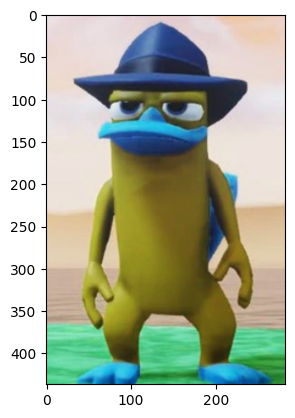

In [90]:
plt.imshow(imag)

In [104]:
imag= cv2.resize(image, (RESIZE_WIDTH, RESIZE_HEIGHT))
imag=resized_image.astype(np.float32) / 255.0

In [99]:
X_train[0].shape

(100, 100, 3)

In [97]:
imag.shape

(100, 100, 3)

In [105]:
model.predict(imag)

ValueError: in user code:

    File "c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_25" is incompatible with the layer: expected shape=(None, 100, 100, 3), found shape=(None, 100, 3)
